In [1]:
library(tidyr)
library(dplyr)
library(tidyverse)
library(stringr)
library(ggplot2)
library(here)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.4.2     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /Users/xiaoqin/Dropbox/TAPE LAB/Manuscripts/Qin & Cardoso Rodriguez et al/SupplementaryMaterials/Qin-CardosoRodriguez-et-al_analysis



In [2]:
# ---
# Prepare dataframe
# ---
# No normalisation
# IdU% can be accessed from Cytobank: https://community.cytobank.org/cytobank/experiments#project-id=1460

emd_df <- read.csv(here("Figure3-4_S3-S4", "Ligand Time-course", "output", "emd", "emd_df_master_concat_no-norm_idu.csv"))
head(emd_df)


,batch,barcode,time_point,media,replicate,culture,condition,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,...,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28,CLU_IdU,LRIG1_IdU
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B4,19,24h,Ctrl,1,24h_Ctrl,24h_Ctrl_1,0.02449284,0.04125797,-0.05758414,...,0.05327044,0.06384870,0.05290020,0.01587955,0.01459531,-0.02491819,0.1438083,0.02440943,3.148148,18.61777
2,B4,20,24h,Ctrl,2,24h_Ctrl,24h_Ctrl_2,0.03644178,0.02706073,-0.05039326,...,-0.02524883,0.05337813,0.04049385,-0.01054593,-0.01018940,0.01349605,0.1161879,0.01276850,1.382488,17.66055
3,B4,21,24h,Ctrl,3,24h_Ctrl,24h_Ctrl_3,0.05375756,-0.06436125,0.09712415,...,-0.05154978,-0.11156864,-0.08445245,-0.01280001,-0.01285611,0.03168674,-0.2475439,-0.03477384,1.195219,22.44898
4,B4,22,24h,EGF,1,24h_EGF,24h_EGF_1,0.29253126,0.32751477,-0.10964213,...,-0.04672629,0.23343011,0.14257045,0.05346349,0.05359782,-0.28934807,0.2516260,0.08604696,1.742919,19.70310
5,B4,23,24h,EGF,2,24h_EGF,24h_EGF_2,0.29255396,0.26799249,0.08731363,...,0.03884503,0.23769434,0.17242747,0.07221617,0.07106963,-0.32595109,0.2414501,0.08958280,1.312910,14.73577
6,B4,24,24h,EGF,3,24h_EGF,24h_EGF_3,0.23296169,0.19891093,0.10297001,...,0.06741332,0.24858664,0.13735846,0.09534888,0.09491416,-0.39308714,0.2107402,0.08617469,1.391036,16.89731


# Prepare DataFrame

In [4]:
emd_df_subset <- emd_df %>% select(culture, time_point, media, X162Dy_LRIG1_1, X174Yb_Clusterin_1, CLU_IdU, LRIG1_IdU)
head(emd_df_subset)

,culture,time_point,media,X162Dy_LRIG1_1,X174Yb_Clusterin_1,CLU_IdU,LRIG1_IdU
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,24h_Ctrl,24h,Ctrl,0.08239149,0.05327044,3.148148,18.61777
2,24h_Ctrl,24h,Ctrl,0.07632140,-0.02524883,1.382488,17.66055
3,24h_Ctrl,24h,Ctrl,-0.15010963,-0.05154978,1.195219,22.44898
4,24h_EGF,24h,EGF,0.40936607,-0.04672629,1.742919,19.70310
5,24h_EGF,24h,EGF,0.30631888,0.03884503,1.312910,14.73577
6,24h_EGF,24h,EGF,0.32169636,0.06741332,1.391036,16.89731


In [6]:
emd_df_subset <- emd_df_subset %>%
    arrange(factor(time_point, levels = c(
        "6h",
        "12h",
        "24h",
        "48h"
    ))) %>%
    arrange(factor(media, levels = c(
        "Ctrl",
        "EGF",
        "WNT3A"
    )))

clu.summary <- emd_df_subset %>%
    group_by(culture) %>%
    summarise(
        # N = n(),
        avg.clu = mean(X174Yb_Clusterin_1),
        SD.clu.low = avg.clu - sd(X174Yb_Clusterin_1),
        SD.clu.high = avg.clu + sd(X174Yb_Clusterin_1)
    )

lrig1.summary <- emd_df_subset %>%
    group_by(culture) %>%
    summarise(
        # N = n(),
        avg.lrig1 = mean(X162Dy_LRIG1_1),
        SD.lrig1.low = avg.lrig1 - sd(X162Dy_LRIG1_1),
        SD.lrig1.high = avg.lrig1 + sd(X162Dy_LRIG1_1)
    )

clu.idu.summary <- emd_df_subset %>%
    group_by(culture) %>%
    summarise(
        # N = n(),
        avg.clu.idu = mean(CLU_IdU),
        SD.clu.idu.low = avg.clu.idu - sd(CLU_IdU),
        SD.clu.idu.high = avg.clu.idu + sd(CLU_IdU)
    )

lrig1.idu.summary <- emd_df_subset %>%
    group_by(culture) %>%
    summarise(
        # N = n(),
        avg.lrig1.idu = mean(LRIG1_IdU),
        SD.lrig1.idu.low = avg.lrig1.idu - sd(LRIG1_IdU),
        SD.lrig1.idu.high = avg.lrig1.idu + sd(LRIG1_IdU)
    )

df_list <- list(clu.summary, clu.idu.summary, lrig1.summary, lrig1.idu.summary)
emd_df_subset_summary <- df_list %>% reduce(left_join, by = "culture")
emd_df_subset_summary[c("time_point", "media")] <- str_split_fixed(emd_df_subset_summary$culture, "_", 2)
head(emd_df_subset_summary)

culture,avg.clu,SD.clu.low,SD.clu.high,avg.clu.idu,SD.clu.idu.low,SD.clu.idu.high,avg.lrig1,SD.lrig1.low,SD.lrig1.high,avg.lrig1.idu,SD.lrig1.idu.low,SD.lrig1.idu.high,time_point,media
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
12h_Ctrl,0.005932466,-0.05571060,0.06757553,1.0579113,0.4805394,1.635283,0.005497259,-0.04241701,0.05341153,18.141557,16.420872,19.86224,12h,Ctrl
12h_EGF,0.097252732,0.06670729,0.12779818,0.9193276,0.5959219,1.242733,0.052365080,-0.01963909,0.12436925,21.021923,19.475376,22.56847,12h,EGF
12h_WNT3A,0.278571634,0.19253749,0.36460578,0.7974409,0.5914520,1.003430,-0.062423337,-0.08072188,-0.04412479,8.706044,6.004961,11.40713,12h,WNT3A
24h_Ctrl,-0.007842724,-0.06237756,0.04669212,1.9086186,0.8310785,2.986159,0.002867755,-0.12964930,0.13538481,19.575767,17.041881,22.10965,24h,Ctrl
24h_EGF,0.019844024,-0.03955077,0.07923882,1.4822884,1.2532201,1.711357,0.345793768,0.29020425,0.40138329,17.112060,14.621441,19.60268,24h,EGF
24h_WNT3A,0.803198042,0.72889047,0.87750562,1.6183411,1.1175223,2.119160,-0.133232160,-0.22742416,-0.03904016,18.766990,14.477106,23.05687,24h,WNT3A


# Line Plot

## EGF

culture,avg.clu,SD.clu.low,SD.clu.high,avg.clu.idu,SD.clu.idu.low,SD.clu.idu.high,avg.lrig1,SD.lrig1.low,SD.lrig1.high,avg.lrig1.idu,SD.lrig1.idu.low,SD.lrig1.idu.high,time_point,media
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
12h_EGF,0.09725273,0.06670729,0.12779818,0.9193276,0.59592186,1.2427334,0.05236508,-0.01963909,0.12436925,21.02192,19.47538,22.56847,12h,EGF
24h_EGF,0.01984402,-0.03955077,0.07923882,1.4822884,1.25322014,1.7113567,0.34579377,0.29020425,0.40138329,17.11206,14.62144,19.60268,24h,EGF
48h_EGF,-0.25836609,-0.29413793,-0.22259425,0.4621363,0.40132439,0.5229482,0.50215677,0.47109617,0.53321736,60.12444,59.19326,61.05563,48h,EGF
6h_EGF,0.01681464,-0.03857672,0.07220601,0.3289634,0.09618771,0.5617391,0.02605125,-0.02687604,0.07897854,38.97294,36.92785,41.01803,6h,EGF


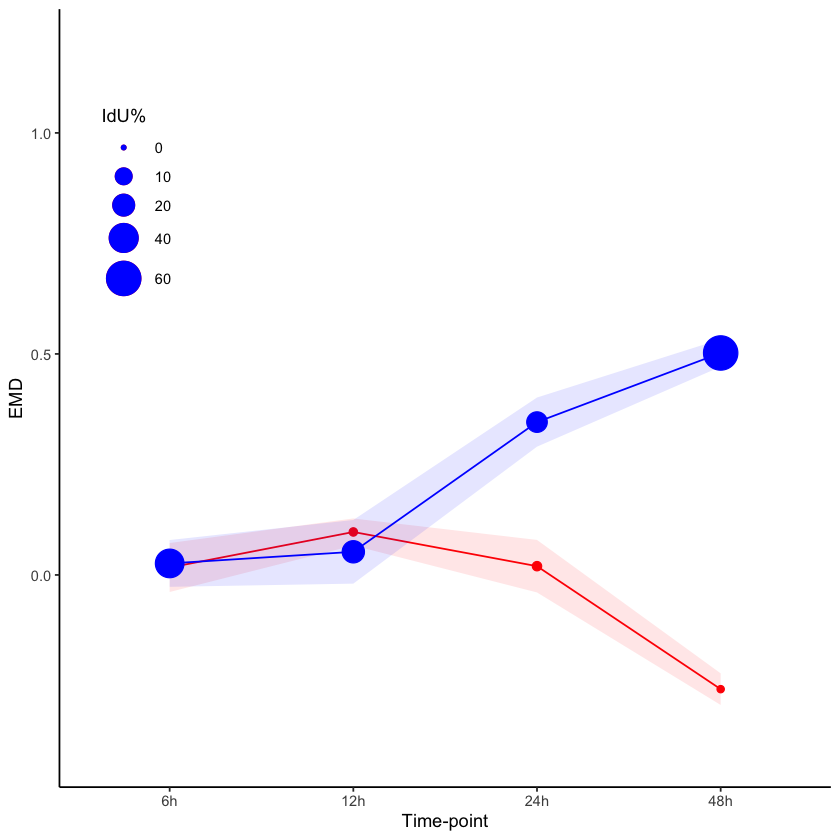

In [7]:
egf <- emd_df_subset_summary %>% filter(media == "EGF")
egf$time_point <- factor(egf$time_point, levels = c("6h", "12h", "24h", "48h"))
head(egf)

ggplot(
    data = egf,
    aes(time_point, group = 1)
) +
    geom_point(aes(y = avg.clu, size = avg.clu.idu), colour = "red") +
    geom_line(aes(y = avg.clu), colour = "red") +
    geom_ribbon(aes(
        ymin = SD.clu.low, ymax = SD.clu.high
    ), fill = "red", linetype = 2, alpha = 0.1) +
    geom_point(aes(y = avg.lrig1, size = avg.lrig1.idu), colour = "blue") +
    geom_line(aes(y = avg.lrig1), colour = "blue") +
    geom_ribbon(aes(
        ymin = SD.lrig1.low, ymax = SD.lrig1.high
    ), fill = "blue", linetype = 2, alpha = 0.1) +
    scale_size(limits = c(0, 70), breaks = c(0, 10, 20, 40, 60), range = c(1, 10)) +
    ylim(-0.4, 1.2) +
    xlab("Time-point") +
    ylab("EMD") +
    labs(size = "IdU%") +
    theme_classic() +
    theme(legend.position = c(.1, .75))

## WNT3A

culture,avg.clu,SD.clu.low,SD.clu.high,avg.clu.idu,SD.clu.idu.low,SD.clu.idu.high,avg.lrig1,SD.lrig1.low,SD.lrig1.high,avg.lrig1.idu,SD.lrig1.idu.low,SD.lrig1.idu.high,time_point,media
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
12h_WNT3A,0.278571634,0.1925375,0.3646058,0.7974409,0.5914520,1.0034297,-0.06242334,-0.08072188,-0.04412479,8.706044,6.004961,11.40713,12h,WNT3A
24h_WNT3A,0.803198042,0.7288905,0.8775056,1.6183411,1.1175223,2.1191599,-0.13323216,-0.22742416,-0.03904016,18.766990,14.477106,23.05687,24h,WNT3A
48h_WNT3A,0.989201956,0.8456840,1.1327199,0.9049086,0.8316466,0.9781706,-0.08671450,-0.23320406,0.05977506,44.764457,43.782226,45.74669,48h,WNT3A
6h_WNT3A,-0.007213943,-0.1231296,0.1087017,0.3266337,0.2366098,0.4166577,-0.06430260,-0.10866359,-0.01994162,30.006170,23.153500,36.85884,6h,WNT3A


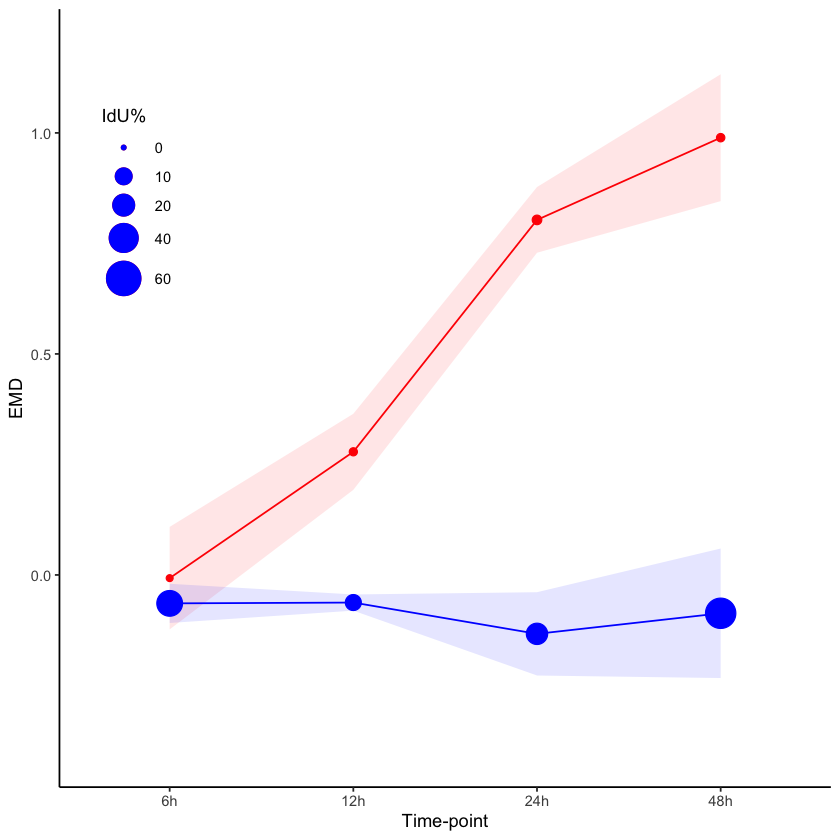

In [9]:
wnt <- emd_df_subset_summary %>% filter(media == "WNT3A")
wnt$time_point <- factor(wnt$time_point, levels = c("6h", "12h", "24h", "48h"))
head(wnt)

ggplot(
    data = wnt,
    aes(time_point, group = 1)
) +
    geom_point(aes(y = avg.clu, size = avg.clu.idu), colour = "red") +
    geom_line(aes(y = avg.clu), colour = "red") +
    geom_ribbon(aes(
        ymin = SD.clu.low, ymax = SD.clu.high
    ), fill = "red", linetype = 2, alpha = 0.1) +
    geom_point(aes(y = avg.lrig1, size = avg.lrig1.idu), colour = "blue") +
    geom_line(aes(y = avg.lrig1), colour = "blue") +
    geom_ribbon(aes(
        ymin = SD.lrig1.low, ymax = SD.lrig1.high
    ), fill = "blue", linetype = 2, alpha = 0.1) +
    scale_size(limits = c(0, 70), breaks = c(0, 10, 20, 40, 60), range = c(1, 10)) +
    ylim(-0.4, 1.2) +
    xlab("Time-point") +
    ylab("EMD") +
    labs(size = "IdU%") +
    theme_classic() +
    theme(legend.position = c(.1, .75))
